array([[-0.89353091,  0.21422802,  0.66042339, ..., -0.1801732 ,
         0.26302041,  0.75031082],
       [-0.04301419, -0.15508087, -0.10846747, ..., -0.08927182,
        -0.26849909, -0.33491828],
       [ 0.40630971, -0.16271138, -0.63691522, ...,  0.82338803,
        -0.88452044,  0.77101109],
       ...,
       [ 0.71887615, -0.38479911, -0.72678584, ...,  0.61512483,
        -0.8902921 , -0.04960267],
       [ 0.75213495, -0.80302959, -0.49813955, ...,  0.14103532,
        -0.75695819, -0.40477201],
       [ 1.01639752, -0.90700998, -0.61371353, ...,  0.04316081,
        -0.75400694, -0.52745531]])

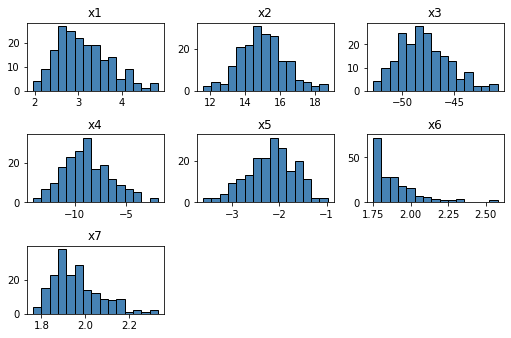

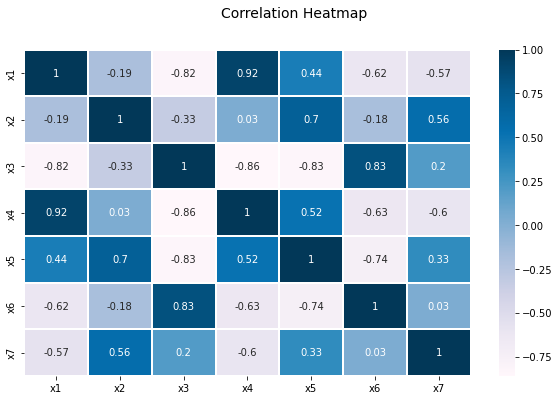

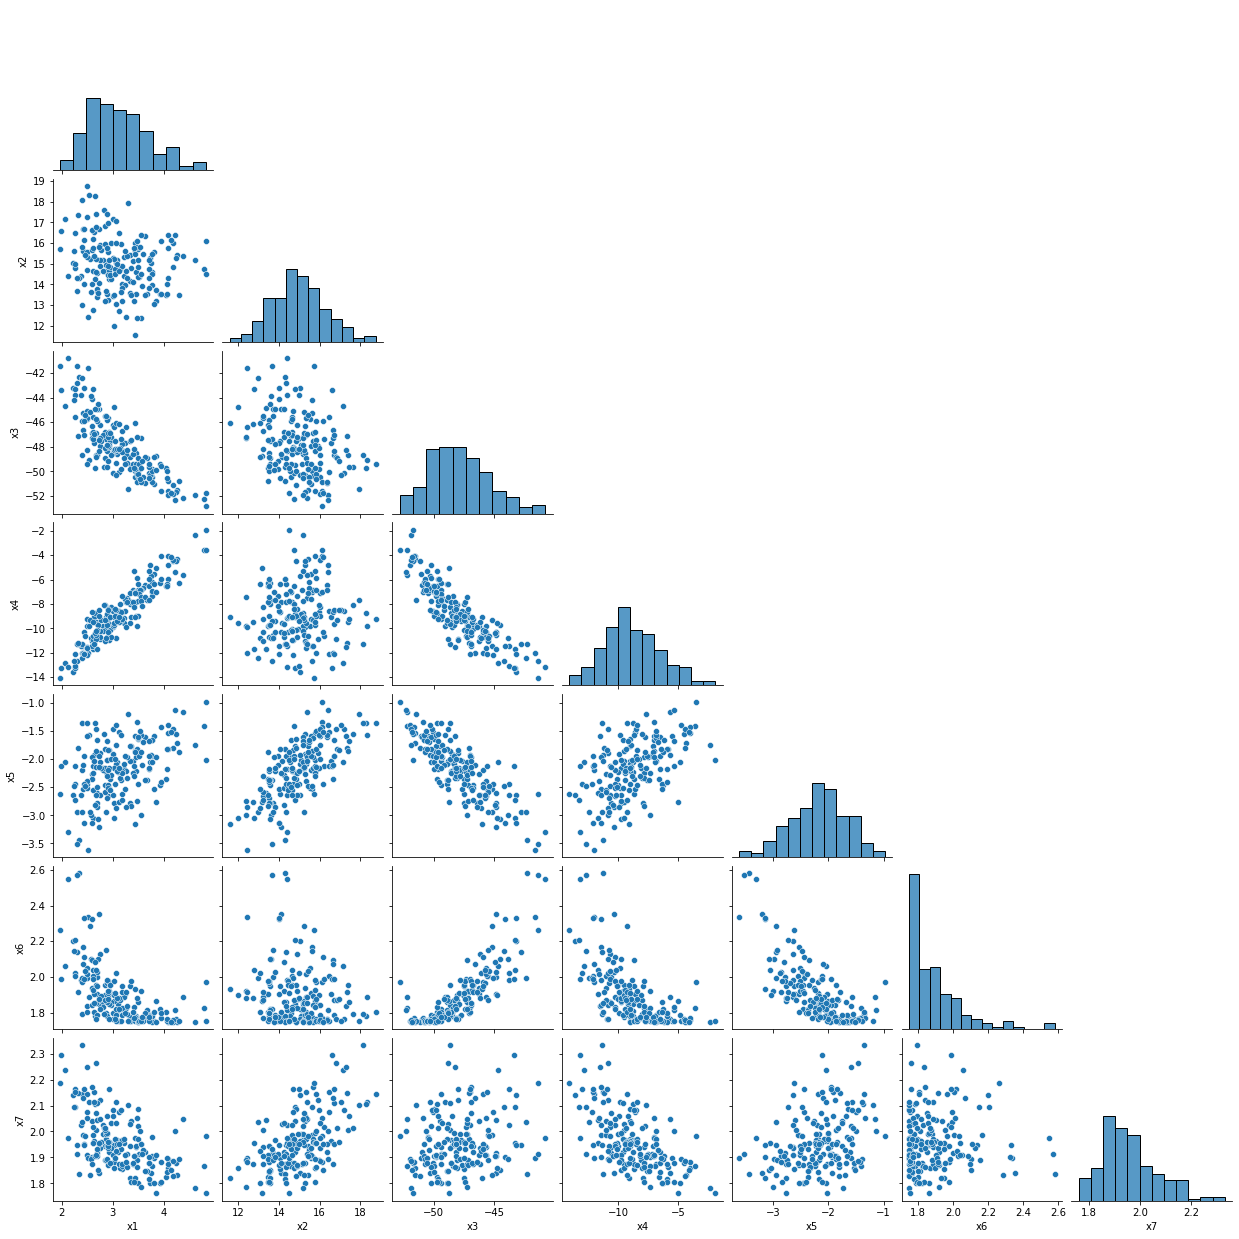

In [21]:


import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
mse_list =[]

url = 'https://raw.githubusercontent.com/MananMohnot/DATA_DUMP/main/EE_769_assignment/DataKPCA.csv'

df = pd.read_csv(url)
df.head()

# Visualizing Data

df.hist(bins=15, color='steelblue', edgecolor='black', linewidth=1.0,grid = False)    
plt.tight_layout(rect=(0, 0, 1.2, 1.2))

# Correlation Matrix Heatmap
f, ax = plt.subplots(figsize=(10, 6))
corr = df.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="PuBu",
                 linewidths=.05)
t= f.suptitle('Correlation Heatmap', fontsize=14)

# Pair Plot
pp=sns.pairplot(df,corner = True )

from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
scalar.fit(df)

scaled_data = scalar.transform(df)
scaled_data

# from sklearn.decomposition import PCA

# for d in dim:
#   pca = PCA(n_components=d)
#   pca.fit(scaled_data)
#   X_pca = pca.transform(scaled_data)
#   X_new = pca.inverse_transform(X_pca)
#   mse = (np.square(X_new - scaled_data)).mean(axis=None)
#   mse_list.append(mse)
#   explained_variance.append(pca.explained_variance_)

# print(mse_list)
# print(explained_variance)


In [22]:
n=10
dim = np.arange(1,n+1)
dim

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [23]:
from sklearn.decomposition import KernelPCA


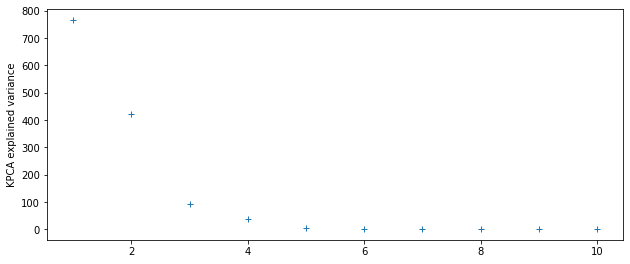

[766.42911394 423.49234088  94.33051388  36.04193633   6.11164995
   2.43738182   1.1570632    0.           0.           0.        ]


In [37]:
explained_variance=[]
for d in dim:
  kpca = KernelPCA(n_components=d)
  kpca.fit(scaled_data)
  X_kpca = kpca.transform(scaled_data)
#   X_new = kpca.inverse_transform(X_kpca)
#   mse = (np.square(X_new - scaled_data)).mean(axis=None)
#   mse_list.append(mse)
  var_value =kpca.eigenvalues_

fig = plt.figure(figsize =(10, 4)) 
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
plt.plot(np.arange(1, kpca.n_components + 1), var_value, "+", linewidth=2)
plt.ylabel("KPCA explained variance")
plt.show()
print(var_value)

In [31]:
print(explained_variance)

[array([766.42911394]), array([766.42911394, 423.49234088]), array([766.42911394, 423.49234088,  94.33051388]), array([766.42911394, 423.49234088,  94.33051388,  36.04193633]), array([766.42911394, 423.49234088,  94.33051388,  36.04193633,
         6.11164995]), array([766.42911394, 423.49234088,  94.33051388,  36.04193633,
         6.11164995,   2.43738182]), array([766.42911394, 423.49234088,  94.33051388,  36.04193633,
         6.11164995,   2.43738182,   1.1570632 ]), array([766.42911394, 423.49234088,  94.33051388,  36.04193633,
         6.11164995,   2.43738182,   1.1570632 ,   0.        ]), array([766.42911394, 423.49234088,  94.33051388,  36.04193633,
         6.11164995,   2.43738182,   1.1570632 ,   0.        ,
         0.        ]), array([766.42911394, 423.49234088,  94.33051388,  36.04193633,
         6.11164995,   2.43738182,   1.1570632 ,   0.        ,
         0.        ,   0.        ])]


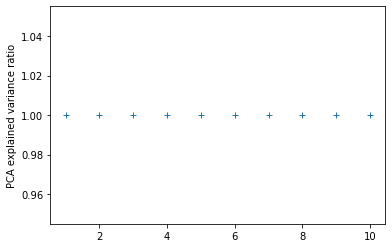